## Extracción, Transformación y Carga

In [1]:
# Librerias necesarias
import pandas as pd
import numpy as np
import json
import ast
import gzip

C:\Users\Martin\AppData\Local\Temp\ipykernel_22016\4171661857.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### EXTRACCIÓN

In [23]:
# Rutas de los datos:
ruta_games='Datasets/steam_games.json.gz'
ruta_reviews='Datasets/user_reviews.json.gz'
ruta_items='Datasets/users_items.json.gz'

## Games:
games = []
with gzip.open(ruta_games, 'rt', encoding='utf-8') as archivo:
    lineas = archivo.readlines()
    for linea in lineas:
        games.append(linea) 

# Quitamos el '\n' al final de cada linea:
for i in range(0,len(games)):
    games[i]= games[i].replace("\n","")
# Transformo cada una de las cadenas a diccionario de Python:
for i in range(0,len(games)):
    games[i]= json.loads(games[i])
    
# Transformamos a DataFrame:
df_games = pd.DataFrame(games)

In [3]:
## Reviews:
reviews = []
with gzip.open(ruta_reviews, 'rt', encoding="utf-8") as archivo:
    lineas = archivo.readlines()
for linea in lineas:
    reviews.append(ast.literal_eval(linea))
    
# Transformamos a DataFrame:
df_reviews = pd.DataFrame(reviews)

In [4]:
## Items:
items = []
with gzip.open(ruta_items, 'rt', encoding="utf-8") as archivo:
    lineas = archivo.readlines()
for linea in lineas:
    items.append(ast.literal_eval(linea))
    
# Transformamos a DataFrame:
df_items = pd.DataFrame(items)

#### Nota: si hicieramos **WebScrapping** en el url del juego en el siguiente **div** podriamos rellenar algunos datos faltantes como 'title', 'genre', 'developer', 'publisher' y 'release_date'



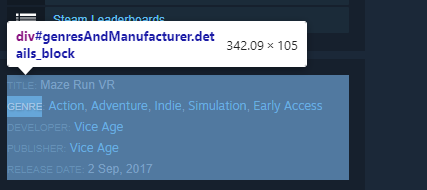

Lo mismo se puede hacer con la base de datos de reviews e items.

#### TRANSFORMACIÓN

Para cada uno de los Datasets se realizarán las siguientes transformaciones:
- Tratamiento de datos faltantes
- Tratamiento de datos faltantes por columna
- Tratamiento de registros duplicados
- Correccion del tipo de dato de cada columna
- Tratamiento de datos anidados

apuntes para df_games:
- release_date --> date
- price --> float
- early_access --> bool
- id --> int

##### Games

In [24]:
df_games.head()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Removemos todos los registros en las que todos los campos son NaN
print(f'El tamaño inicial del dataset es: {df_games.shape}')
df_games.dropna(how='all',inplace=True, ignore_index=True)
print(f'Removiendo todos los registros en las que todos los campos son NaN nos queda un tamaño de: {df_games.shape}')

El tamaño inicial del dataset es: (120445, 13)
Removiendo todos los registros en las que todos los campos son NaN nos queda un tamaño de: (32135, 13)


In [43]:
df_games['publisher'].isna().value_counts()

publisher
False    24083
True      8052
Name: count, dtype: int64

In [46]:
df_games['genres'].isna().value_counts()

genres
False    28852
True      3283
Name: count, dtype: int64

In [47]:
df_games['app_name'].isna().value_counts()

app_name
False    32133
True         2
Name: count, dtype: int64

In [48]:
df_games['title'].isna().value_counts()

title
False    30085
True      2050
Name: count, dtype: int64

In [37]:
# Tratamiento de registros duplicados: cada juego tiene un id unico por eso no se puede repetir
subset = df_games[['publisher','app_name','title','url','release_date','reviews_url','price','early_access','id','developer']]
#tuve que armar un subset xq los datos anidados no los admite para verificar los duplicados, 
# arme el mismo df pero sin las columamnas con datos anidados. NO HAY REGISTROS DUPLICADOS, se mantienen 31135 reg
subset.drop_duplicates()

,publisher,app_name,title,url,release_date,reviews_url,price,early_access,id,developer
0,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,http://steamcommunity.com/app/761140/reviews/?...,4.99,False,761140,Kotoshiro
1,"Making Fun, Inc.",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,http://steamcommunity.com/app/643980/reviews/?...,Free To Play,False,643980,Secret Level SRL
2,Poolians.com,Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,http://steamcommunity.com/app/670290/reviews/?...,Free to Play,False,670290,Poolians.com
3,彼岸领域,弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,http://steamcommunity.com/app/767400/reviews/?...,0.99,False,767400,彼岸领域
4,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,http://steamcommunity.com/app/773570/reviews/?...,2.99,False,773570,NaN
...,...,...,...,...,...,...,...,...,...,...
32130,Ghost_RUS Games,Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,http://steamcommunity.com/app/773640/reviews/?...,1.99,False,773640,"Nikita ""Ghost_RUS"""
32131,Sacada,LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,http://steamcommunity.com/app/733530/reviews/?...,4.99,False,733530,Sacada
32132,Laush Studio,Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,http://steamcommunity.com/app/610660/reviews/?...,1.99,False,610660,Laush Dmitriy Sergeevich
32133,SIXNAILS,EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,http://steamcommunity.com/app/658870/reviews/?...,4.99,False,658870,"xropi,stev3ns"


In [44]:
df_games['url'][0]

'http://store.steampowered.com/app/761140/Lost_Summoner_Kitty/'

In [17]:
for i in df_games['release_date']:
    if (type(i)==float):
        print(i)
    elif (len(i)!=10):
        print(i)

nan
Soon..
nan
nan
nan
nan
nan
nan
nan
2017
Beta测试已开启
nan
nan
nan
nan
Jun 2009
Oct 2010
Oct 2010
Oct 2010
Feb 2011
nan
nan
nan
nan
nan
nan
Aug 2014
nan
nan
nan
Aug 2014
Aug 2014
Aug 2014
Aug 2014
Aug 2014
Sep 2014
nan
nan
nan
nan
nan
nan
Apr 2015
Apr 2015
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2017
2017
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
Apr 2016
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
Jul 2016
nan
nan
June 2016
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
Coming Soon
2017
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
Q2 2017
nan
nan
nan
nan
Coming Soon
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
T

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
10,Qucheza,"[Action, Indie, Simulation, Early Access]",Uncanny Islands,Uncanny Islands,http://store.steampowered.com/app/768570/Uncan...,Soon..,"[Early Access, Action, Indie, Simulation, Surv...",http://steamcommunity.com/app/768570/reviews/?...,[Single-player],NaN,True,768570,Qucheza


In [8]:
df_games['release_date'] = pd.to_datetime(df_games['release_date'], format='%Y-%m-%d')

ValueError: time data "Soon.." doesn't match format "%Y-%m-%d", at position 10. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.